In [46]:
# set up the data set
from datetime import time
import pandas as pd

data = pd.read_excel(r"newInput.xlsx")
df = pd.DataFrame(data)

In [47]:
"""defining functions to converts to seconds and then  back to time object """
def convertToSec(time_obj):
    return (time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second)

def convertToTime(seconds):
    hour, remainder = divmod(seconds, 3600)
    minute, second = divmod(remainder, 60)
    return time(hour, minute, second)

In [48]:
#global variables 
# writer = pd.ExcelWriter()
strToTime = lambda strTime: time(*[int(x) for x in strTime.split(':')])
sorted_set = df.sort_values('Departure Time', ascending=True).reset_index(drop=True)

In [49]:
# '''Creates the first row of output'''
# """Getting the first row from the start_set and add it to the route_plot.
# This is the first row of the output """

# def plotRoute():

#     # global writer 
#     global sorted_set

#     #It is the initial set where the departure place is PSL 
#     start_set = sorted_set[sorted_set['Departure Place'] == 'PSL'].reset_index(drop=True)
#     #setting the first leg of a trip 
#     route_plot = start_set.iloc[0].to_frame().T

#     #deleting the first set row that is pushed in to the route_plot
#     sorted_set = sorted_set.drop((sorted_set[(sorted_set['Sl No.'] == start_set.loc[0, 'Sl No.'])]).index)
#     hr_of_work = convertToSec(strToTime(route_plot.iat[0,7]))#selecting the running time of a leg ONLY 
#     i = 0 
#     #variable i may be irrelevant in this context but it is declared for future updations
      
#     while((last_leg := route_plot.iloc[len(route_plot) - 1])['Arrival Place'] != 'PSL'):
#         temp_set = df[(df['Departure Place'] == last_leg['Arrival Place']) & (df['Departure Time'] > last_leg['Arrival Time act'])]
#         temp_set = temp_set.sort_values('Departure Time', ascending=True ).reset_index(drop=True)
#         new_leg = temp_set.iloc[i].to_frame().T

#         # calculating terminal gap
#         new_leg['Terminal Gap'] = convertToTime(convertToSec(strToTime(new_leg.at[0,'Departure Time'])) - convertToSec(strToTime(last_leg['Arrival Time act'])))

#         #calculating hr of work ==> for that convert the time to seconds and add
#         temp_time = hr_of_work
#         temp_time += convertToSec(strToTime(new_leg.iat[0,7]))
#         # if temp_time > convertToSec(time(9, 0, 0)):
#         #     i+=1
#         #     continue
#         route_plot = pd.concat([route_plot, new_leg], ignore_index=True)
#         hr_of_work += convertToSec(strToTime(new_leg.iat[0,7]))      
#         i = 0

#         #dropping the row (new_leg row data) from the sorted_set 
#         sorted_set = sorted_set.drop((sorted_set[(sorted_set['Sl No.'] == new_leg.loc[0, 'Sl No.'])]).index)
#     route_plot['Terminal Gap'] = route_plot['Terminal Gap'].shift(-1)
#     display(route_plot)

#     # route_plot.to_excel("file"+str(k)+".xlsx", index=False)

#     print("Total Stirring Duty = ", convertToTime(hr_of_work))
#     sorted_set = sorted_set.reset_index(drop=True)
    
# # plotRoute()
# #add the steering duty with terminal gap

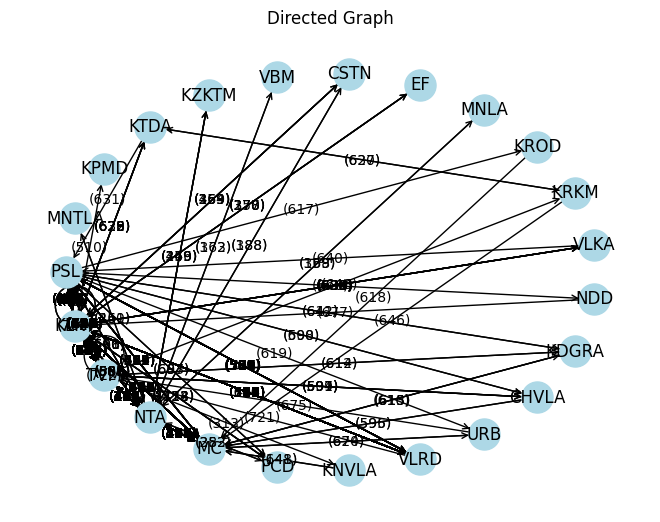

['PSL', 'VLRD']
Total routes =  1
Number of edges =  727
[1, 15, 4, 6, 17, 7, 8, 9, 13, 12, 11, 14, 18, 16, 21, 22, 20, 10, 25, 26, 3, 27, 28, 30, 32, 33, 35, 36, 37, 39, 2, 31, 34, 41, 24, 42, 40, 47, 48, 45, 49, 50, 23, 29, 51, 52, 19, 46, 690, 43, 5, 53, 44, 54, 61, 59, 38, 57, 56, 58, 60, 64, 62, 63, 55, 65]


In [50]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame called 'df' with columns 'source' and 'target'

# Create an empty directed graph
G = nx.MultiDiGraph()

# Add edges to the graph from the DataFrame
G.add_weighted_edges_from(zip(sorted_set['Departure Place'], sorted_set['Arrival Place'], sorted_set['Sl No.']))

# Draw the directed graph
pos = nx.shell_layout(G)  # Positions of the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, arrowstyle='->', arrowsize=10)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title('Directed Graph')

for u, v, data in G.edges(data=True):
    # label = data['label']
    weight = data['weight']
    x = pos[u][0] + (pos[v][0] - pos[u][0]) / 2
    y = pos[u][1] + (pos[v][1] - pos[u][1]) / 2
    plt.text(x, y, f"({weight})", horizontalalignment='center', verticalalignment='center')

# Show the plot
# plt.show()
plt.show()


# adjacency matrix 
adj_matrix = nx.adjacency_matrix(G)
adj_matrix_array = np.array(adj_matrix)
# print(adj_matrix_array)

#all routes 

routes = nx.simple_cycles(G)
# print((routes))
i = 0
for x in routes:
    if x[0] == "PSL":
        # weights = []
        # for y in range(len(x) - 1):
        #     weights.append(G[x[y]][x[y+1]]['weight'])
        # print(weights)
        print(x)
        i+=1

#check whether a path exist 
# path = ['PSL', 'KLKV', 'TVM', 'NTA', 'MC', 'PSL']
# path_exists = all((u, v) in G.edges() for u, v in zip(path, path[1:]))
# print('#############', path_exists)

print("Total routes = ", i)
print("Number of edges = ", G.number_of_edges())

# edgeData = G.get_edge_data('PSL', 'KLKV')
# print([data['weight'] for data in edgeData.values()])

In [51]:
# length = len(df[df['Departure Place'] == 'PSL'])
# # print("*************  ", length)
# for k in  range(length):
#     print("\n Route - ", k, "\n")
#     try:
#         plotRoute()
#     except Exception as e:
#         print("<<<<<<<<<<<<<<<<<<< Exception occured ==> ", e, ">>>>>>>>>>>>>>>>>>>>>>")
#         continue

In [52]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Create a MultiDiGraph
# G = nx.MultiDiGraph()

# # Add multiple edges between nodes with weights
# G.add_edge(1, 2, weight=5)
# G.add_edge(1, 2, weight=10)
# G.add_edge(2, 3, weight=7)

# # Draw the graph
# pos = nx.spring_layout(G)  # Layout algorithm for node positioning
# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12, font_weight='bold')

# # Draw edge labels
# edge_labels = nx.get_edge_attributes(G, 'weight')
# # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# for u, v, data in G.edges(data=True):
#     # label = data['label']
#     weight = data['weight']
#     x = pos[u][0] + (pos[v][0] - pos[u][0]) / 2
#     y = pos[u][1] + (pos[v][1] - pos[u][1]) / 2
#     plt.text(x, y, f"({weight})", horizontalalignment='center', verticalalignment='center')

# # Show the plot
# # plt.show()
# plt.show()

# # Show the graph
# plt.show()

# routes = nx.all_simple_paths(G, 1, 3)
# for x in routes:
#     edge_data = G.get_edge_data(x[0], x[1])
#     print([data['weight'] for data in edge_data.values()])
#     print(x)


In [53]:
# start_set = sorted_set[sorted_set['Departure Place'] == 'PSL'].reset_index(drop=True)
# route_plot = start_set.iloc[0].to_frame().T
# xx = 0
# def newRoutes():
#     global xx 
#     global  route_plot
#     # newRoutes.last_leg = ''
#     # hr_of_work = convertToSec(strToTime(newRoutes.route_plot.iat[0,7]))#selecting the running time of a leg ONLY 
#     i = 0
#     # while(last_leg['Arrival Place'] != 'PSL'):
#     newRoutes.last_leg  = route_plot.iloc[len(route_plot) - 1]
#     temp_set = df[(df['Departure Place'] == newRoutes.last_leg['Arrival Place']) & (df['Departure Time'] > newRoutes.last_leg['Arrival Time act'])]
#     # temp_set = df[(df['Departure Place'] == newRoutes.last_leg[]) & (df[1] > newRoutes.last_leg [5])]
#     temp_set = temp_set.sort_values('Departure Time', ascending=True ).reset_index(drop=True)
#     new_leg = temp_set.iloc[i].to_frame().T
#     newRoutes.route_plot = pd.concat([route_plot, new_leg], ignore_index=True)

#     if newRoutes.last_leg['Arrival Place'] == 'PSL':
#         print(xx)
#         xx += 1
#         return newRoutes.route_plot
#     print(newRoutes.last_leg ['Arrival Place'])
#     display(new_leg)
#     newRoutes.last_leg = new_leg
#     return newRoutes()  

# # newRoutes()
        

In [54]:
# i = 0
# def fun():
#     global i
#     fun.static_var = 10
#     # print(i, fun.static_var)
#     if i == 5:
#         fun.static_var = 22
#         return fun.static_var
#     i+=1
#     return (i, fun())
# fun()

